### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)


pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_lifestyle.csv")

In [3]:
df

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,Sedentary
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,Weight Trainer
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,Weight Trainer
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,Weight Trainer
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,Weight Trainer
...,...,...,...,...,...,...,...
2995,82.056086,140.614679,21.432227,24.162064,41.550757,7283.430137,Weight Trainer
2996,90.113362,144.578567,21.432304,18.346046,40.459149,7110.720548,Weight Trainer
2997,81.907737,148.378812,21.598411,22.797690,5.838148,5153.890411,Sedentary
2998,69.910868,140.814891,26.134180,26.965661,5.176265,5167.194521,Sedentary


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avg_resting_heartrate  3000 non-null   float64
 1   avg_active_heartrate   3000 non-null   float64
 2   avg_bmi                3000 non-null   float64
 3   avg_vo2                3000 non-null   float64
 4   avg_workout_minutes    3000 non-null   float64
 5   avg_steps              3000 non-null   float64
 6   lifestyle              3000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 164.2+ KB


In [5]:
df.describe(include='all')

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,Cardio Enthusiast
freq,NaN,NaN,NaN,NaN,NaN,NaN,1064
mean,62.266620,119.975708,22.902468,32.351569,35.573140,10211.991552,NaN
std,12.521525,16.910238,4.492680,7.029757,12.472619,2985.154675,NaN
min,45.046490,82.041834,7.592313,10.934276,4.219295,5047.646575,NaN
25%,52.024483,106.580546,19.761279,27.334516,32.626821,7181.889726,NaN
50%,58.526237,117.846432,22.912607,33.212109,36.840635,10839.997260,NaN
75%,70.799247,131.758270,26.005915,37.412472,41.755371,12759.914384,NaN


In [6]:
df.shape

(3000, 7)

In [7]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'avg_bmi', 'avg_vo2', 'avg_workout_minutes', 'avg_steps', 'lifestyle'], dtype='object')

In [8]:
df.lifestyle.value_counts()

Cardio Enthusiast    1064
Athlete               859
Weight Trainer        765
Sedentary             312
Name: lifestyle, dtype: int64

### Data Visualization

### Univariate Data Exploration

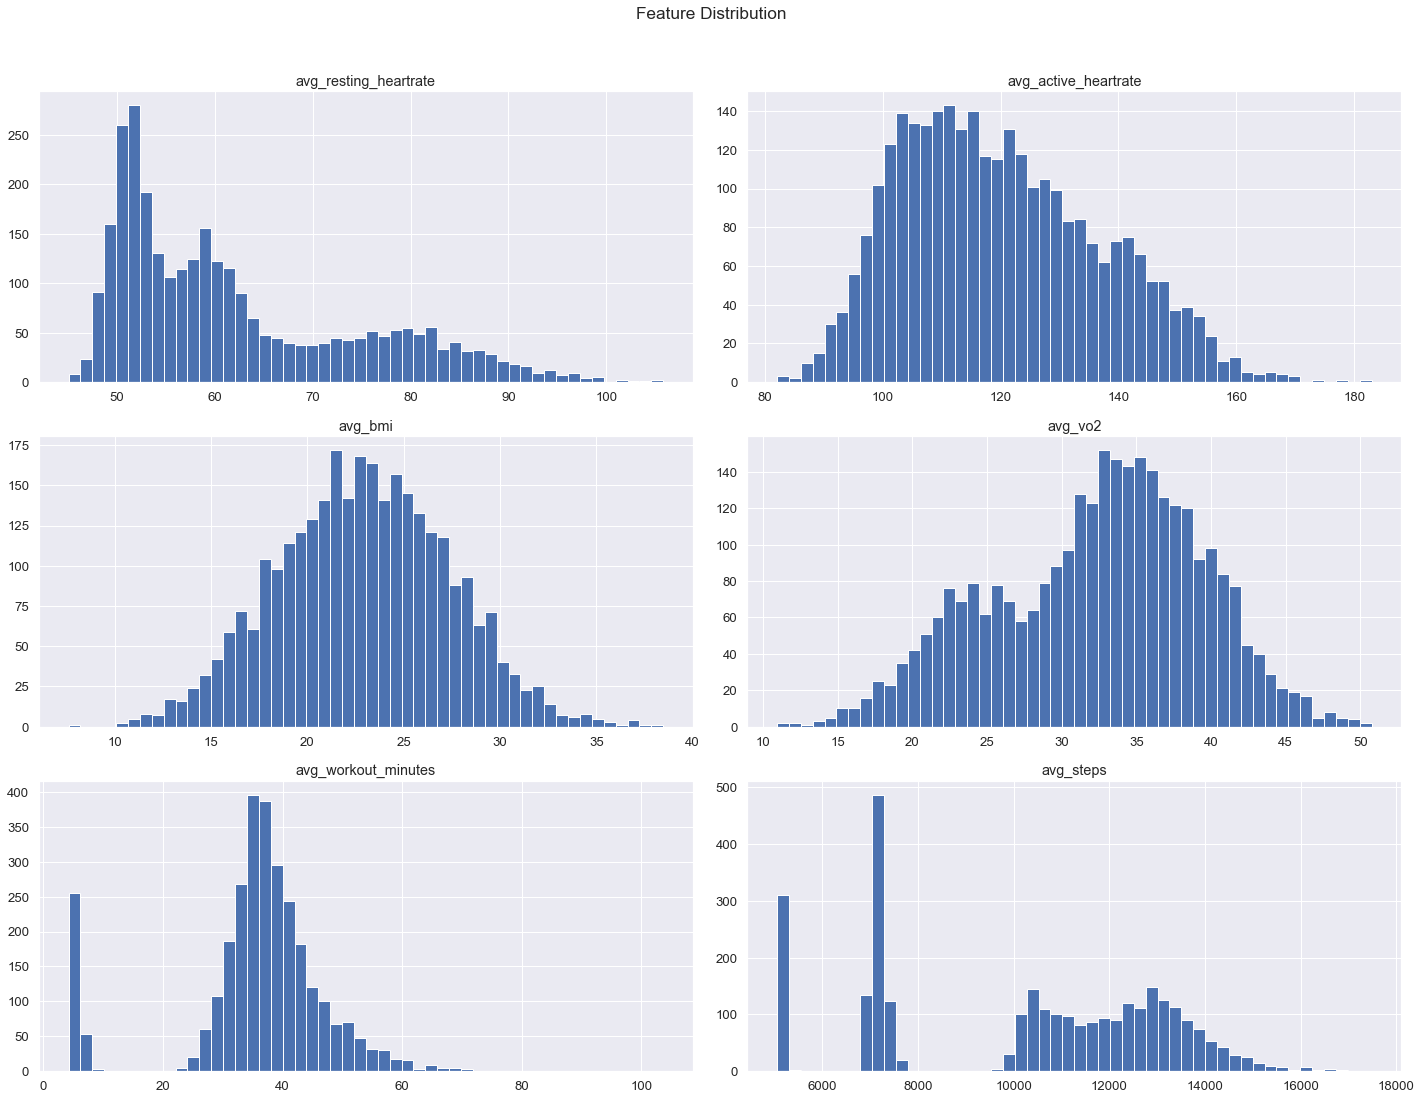

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

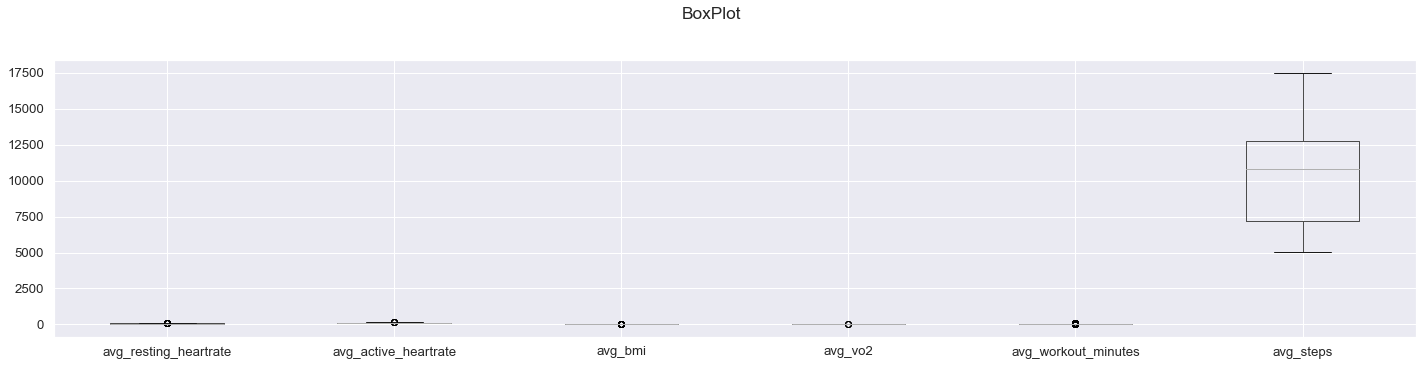

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps
avg_resting_heartrate,1.000000,0.806261,0.143967,-0.941182,-0.374457,-0.789815
avg_active_heartrate,0.806261,1.000000,0.328879,-0.789361,-0.393310,-0.817233
avg_bmi,0.143967,0.328879,1.000000,-0.127956,-0.377415,-0.453897
avg_vo2,-0.941182,-0.789361,-0.127956,1.000000,0.306123,0.731383
avg_workout_minutes,-0.374457,-0.393310,-0.377415,0.306123,1.000000,0.472424
avg_steps,-0.789815,-0.817233,-0.453897,0.731383,0.472424,1.000000


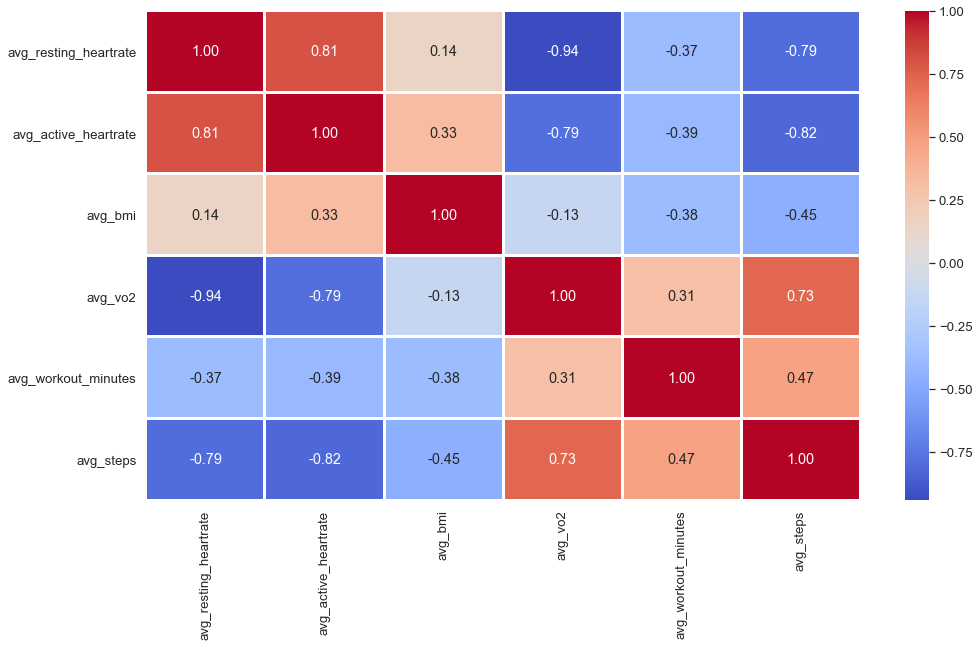

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

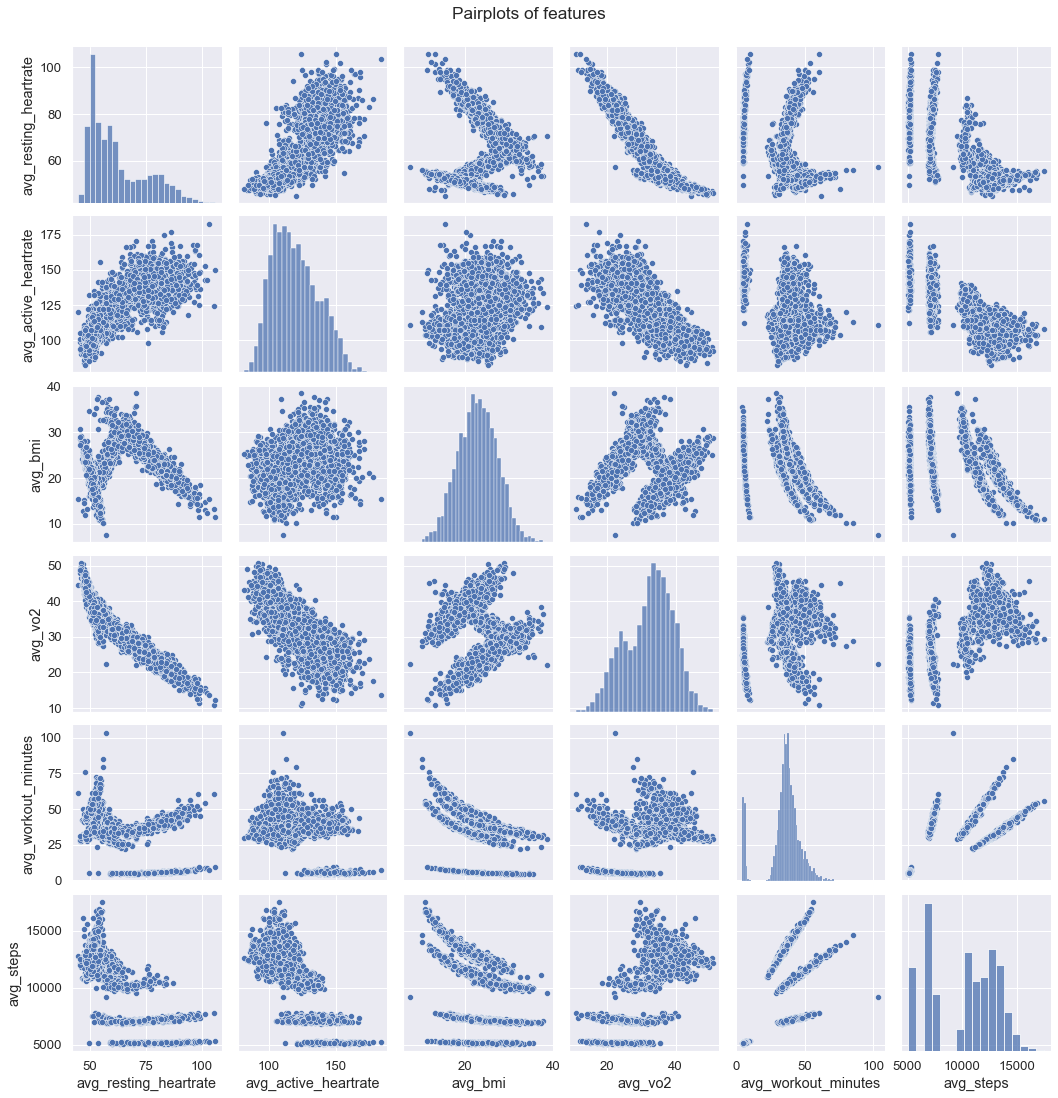

In [13]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

In [14]:
#Map lifestyle to binary

In [15]:
df['lifestyle'] = df['lifestyle'].map({'Sedentary':0, 'Weight Trainer':1, 'Athlete':1, 'Cardio Enthusiast':1})

In [16]:
df["lifestyle"].value_counts()

1    2688
0     312
Name: lifestyle, dtype: int64

In [17]:
df

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,0
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,1
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,1
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,1
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,1
...,...,...,...,...,...,...,...
2995,82.056086,140.614679,21.432227,24.162064,41.550757,7283.430137,1
2996,90.113362,144.578567,21.432304,18.346046,40.459149,7110.720548,1
2997,81.907737,148.378812,21.598411,22.797690,5.838148,5153.890411,0
2998,69.910868,140.814891,26.134180,26.965661,5.176265,5167.194521,0


### Train Test Split

In [18]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

### Train Test Split Cont'd

In [19]:
X.values, y.values

(array([[  82.68379728,  139.43487473,   22.39806365,   20.99401158,
            5.50263247, 5171.49589041],
        [  77.73294229,  127.05715347,   25.15081265,   25.52747527,
           37.21670181, 7115.59178082],
        [  86.51162896,  147.31573127,   19.148256  ,   19.44840652,
           45.00008651, 7257.69315068],
        ...,
        [  81.90773695,  148.37881155,   21.59841078,   22.79769019,
            5.83814781, 5153.89041096],
        [  69.91086843,  140.81489091,   26.13418039,   26.96566092,
            5.17626546, 5167.19452055],
        [  97.98210157,  139.56732889,   15.75133025,   12.42725884,
           52.40329518, 7559.28493151]]),
 array([0, 1, 1, ..., 0, 0, 1], dtype=int64))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2550, 6), (450, 6), (2550,), (450,))

### Treat Missing Values

In [22]:
X_train.isnull().sum()

avg_resting_heartrate    0
avg_active_heartrate     0
avg_bmi                  0
avg_vo2                  0
avg_workout_minutes      0
avg_steps                0
dtype: int64

In [23]:
X_test.isnull().sum()

avg_resting_heartrate    0
avg_active_heartrate     0
avg_bmi                  0
avg_vo2                  0
avg_workout_minutes      0
avg_steps                0
dtype: int64

### Feature Scaling

In [24]:
X_train

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps
422,55.379172,114.847288,22.002907,34.151571,30.581632,12625.063014
838,56.996730,116.005573,23.471748,36.415269,44.377966,11114.764384
1735,51.016680,91.966741,18.893491,38.392252,50.937465,11658.246575
746,58.283746,123.242833,22.852430,34.513867,43.639030,10835.591781
900,61.116570,125.025656,25.419695,30.988530,38.422210,10340.331507
...,...,...,...,...,...,...
763,54.774950,128.546780,22.100006,35.797254,48.140014,11314.109589
835,64.499411,116.193187,28.789730,30.484438,35.647839,7112.860274
1653,50.770937,112.290051,22.671061,40.978260,44.896810,11068.243836
2607,76.451872,129.705381,24.862678,24.945521,5.306249,5139.671233


In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
X_train_scaled

array([[-0.54659243, -0.29768881, -0.19590015,  0.25545804, -0.3850996 ,
         0.80253425],
       [-0.41749712, -0.22975943,  0.12922006,  0.57692284,  0.70778477,
         0.30132171],
       [-0.89475768, -1.63955323, -0.88415262,  0.85767153,  1.22739918,
         0.48168345],
       ...,
       [-0.9143701 , -0.44766186, -0.04800787,  1.22490713,  0.74888528,
         0.28588325],
       [ 1.13519422,  0.5736866 ,  0.43709485, -1.05188101, -2.38730323,
        -1.68159185],
       [ 1.21697461,  0.42211797,  0.71257667, -1.09403049, -0.1536556 ,
        -0.10128109]])

In [28]:
X_test_scaled = scaler.transform(X_test)

In [29]:
X_test_scaled

array([[-0.40639774,  0.66745418, -0.01263876,  0.33151102,  0.76485526,
         0.24419577],
       [-0.56209961,  0.1277219 , -0.02621463,  0.42205428,  0.63804594,
        -0.96351261],
       [-0.91651457, -0.48475152, -0.2708773 ,  0.59224526, -0.30692535,
         0.80438086],
       ...,
       [-1.19066824, -1.4022321 , -2.20389032,  1.90419385,  1.16401685,
         1.94884158],
       [-1.12701977, -1.70146808,  0.62428225,  2.1091303 , -0.53172688,
         0.67717088],
       [-1.17990332, -2.01308617,  0.45615676,  1.84263937, -0.41212284,
         0.70480917]])

### Model Training

### Logistic Regression

In [30]:
lr  = LogisticRegression()

In [31]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(X_test_scaled)

In [33]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
lr.score(X_test_scaled,y_test)

1.0